In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
import seaborn as sns
import pickle

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe(include='O')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)
df_train = pd.concat([X_train, y_train], axis=1)
df_train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
334,335,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,1
681,682,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C,1
289,290,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,1
597,598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,0
229,230,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 170 to 815
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Name         668 non-null    object 
 3   Sex          668 non-null    object 
 4   Age          533 non-null    float64
 5   SibSp        668 non-null    int64  
 6   Parch        668 non-null    int64  
 7   Ticket       668 non-null    object 
 8   Fare         668 non-null    float64
 9   Cabin        153 non-null    object 
 10  Embarked     667 non-null    object 
 11  Survived     668 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 67.8+ KB


In [11]:
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,668.000000,533.000000,668.000000,668.000000,668.000000,668.000000
mean,452.378743,2.311377,29.442627,0.529940,0.383234,32.312088,0.375749
std,259.152520,0.838748,14.791845,1.110399,0.830357,49.485215,0.484678
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,231.500000,2.000000,20.000000,0.000000,0.000000,7.917700,0.000000
50%,455.500000,3.000000,28.000000,0.000000,0.000000,14.458300,0.000000
75%,681.250000,3.000000,38.000000,1.000000,0.000000,31.275000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


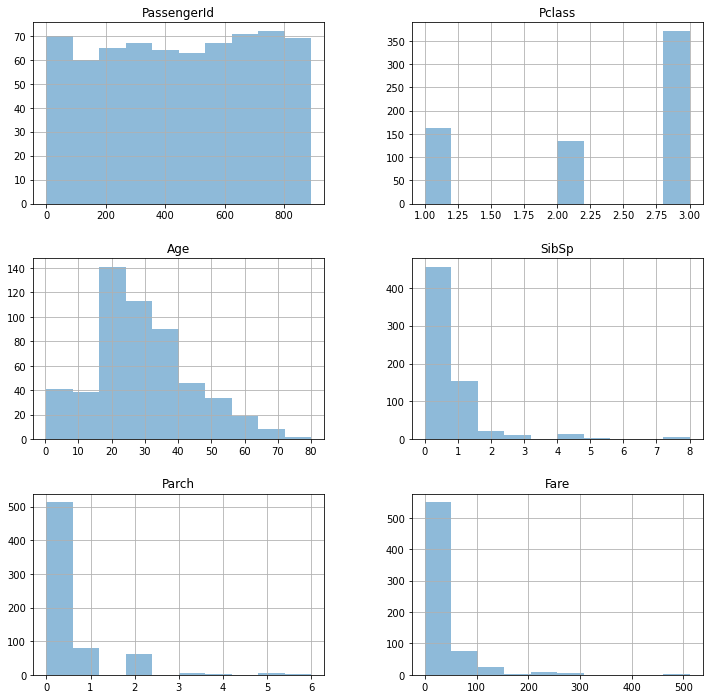

In [12]:
X_train.hist(figsize=(12,12), alpha=0.5)
plt.show()

In [13]:
drop_cols = ['PassengerId','Cabin', 'Ticket', 'Name']
df_train = df_train.drop(drop_cols, axis = 1)


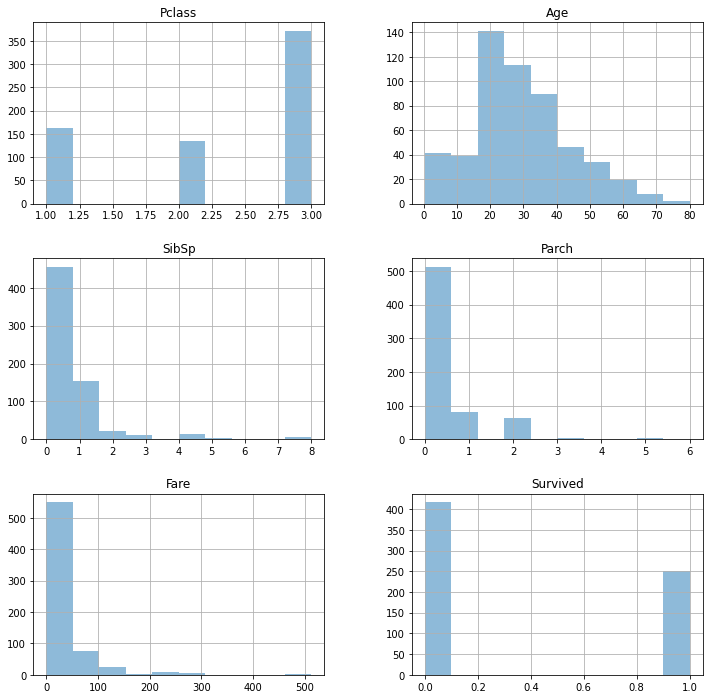

In [14]:
df_train.hist(figsize=(12,12), alpha=0.5)
plt.show()

In [15]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)
df_train = pd.concat([X_train, y_train], axis=1)

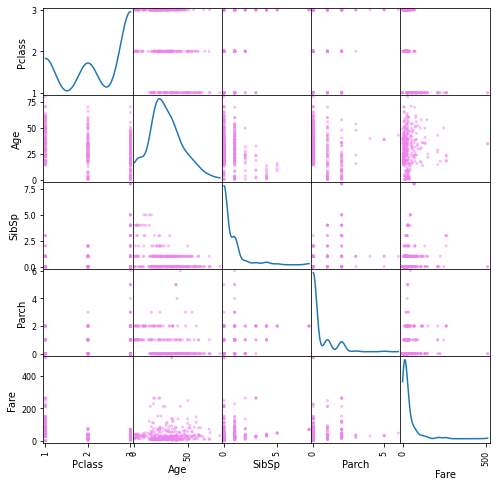

In [16]:
pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(8,8), c='Violet')
plt.show()

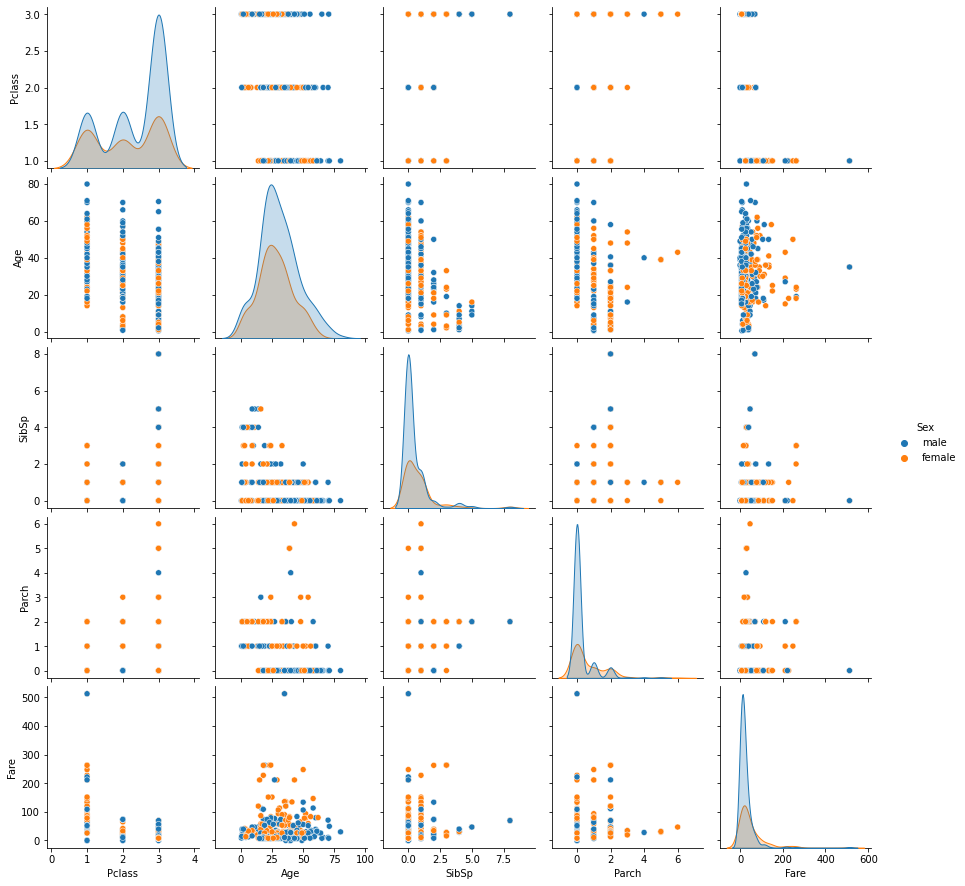

In [17]:
sns.pairplot(data=X_train, hue='Sex')
plt.show()

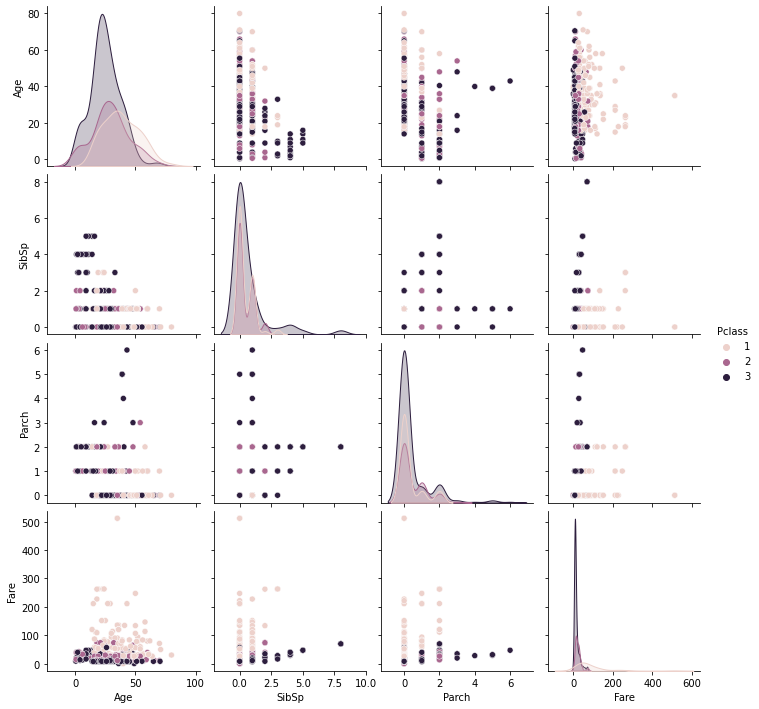

In [18]:
sns.pairplot(data=X_train, hue='Pclass')
plt.show()

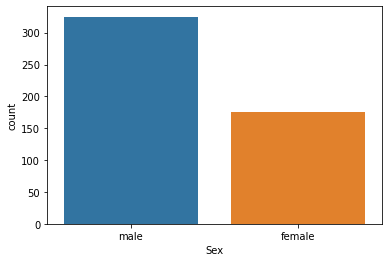

In [19]:
sns.countplot(data=X_train, x='Sex')

plt.show()

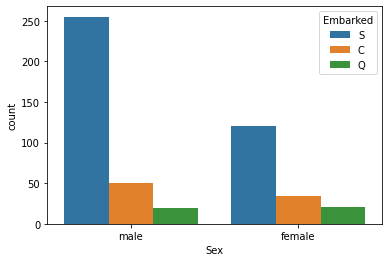

In [20]:
sns.countplot(data=X_train, x='Sex', hue='Embarked')

plt.show()

In [21]:
X_train.corr().style.background_gradient(cmap='Blues')

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.366641,0.100844,0.033987,-0.524987
Age,-0.366641,1.000000,-0.330203,-0.209839,0.072957
SibSp,0.100844,-0.330203,1.000000,0.450503,0.176871
Parch,0.033987,-0.209839,0.450503,1.000000,0.186484
Fare,-0.524987,0.072957,0.176871,0.186484,1.000000


In [22]:
df_train.corr().style.background_gradient(cmap='Blues')

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.366641,0.100844,0.033987,-0.524987,-0.356308
Age,-0.366641,1.000000,-0.330203,-0.209839,0.072957,-0.114089
SibSp,0.100844,-0.330203,1.000000,0.450503,0.176871,-0.070225
Parch,0.033987,-0.209839,0.450503,1.000000,0.186484,0.112683
Fare,-0.524987,0.072957,0.176871,0.186484,1.000000,0.286336
Survived,-0.356308,-0.114089,-0.070225,0.112683,0.286336,1.000000


<AxesSubplot:xlabel='Survived', ylabel='Age'>

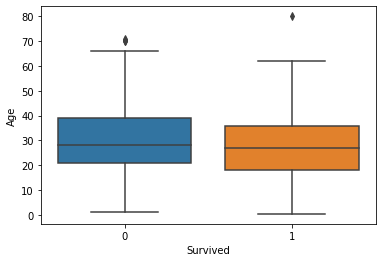

In [23]:
sns.boxplot(data=df_train, x='Survived', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

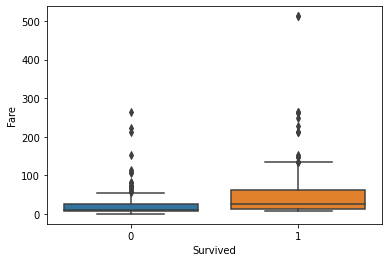

In [24]:
sns.boxplot(data=df_train, x='Survived', y='Fare')

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

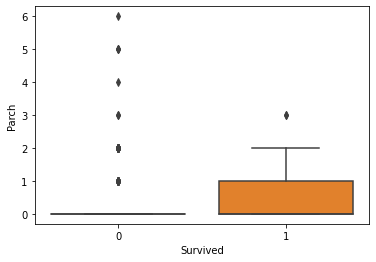

In [25]:
sns.boxplot(data=df_train, x='Survived', y='Parch')

*TRAIN

In [26]:
imputer_mean = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer_mean = imputer_mean.fit(X_train[['Age']])
X_train['Age'] = imputer_mean.transform(X_train[['Age']])


imputer_mode = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_mode = imputer_mode.fit(X_train[['Embarked']])
X_train['Embarked'] = imputer_mode.transform(X_train[['Embarked']])

In [27]:
X_test['Age'] = imputer_mean.transform(X_test[['Age']])

X_test['Embarked'] = imputer_mode.transform(X_test[['Embarked']])

In [28]:
X_train[['Sex','Embarked']]=X_train[['Sex','Embarked']].astype('category')
X_test[['Sex','Embarked']]=X_test[['Sex','Embarked']].astype('category')


X_train['Sex']=X_train['Sex'].cat.codes
X_train['Embarked']=X_train['Embarked'].cat.codes

X_test['Sex']=X_test['Sex'].cat.codes
X_test['Embarked']=X_test['Embarked'].cat.codes

RANDOM FOREST

In [29]:
rfc = RandomForestClassifier(random_state=1107)

rfc.fit(X_train, y_train)

print(f'Train_ac: {rfc.score(X_train, y_train)}')

print(f'Test_ac: {rfc.score(X_test, y_test)}')

Train_ac: 0.9860279441117764
Test_ac: 0.8083832335329342


In [30]:
y_pred_rfc = rfc.predict(X_test)

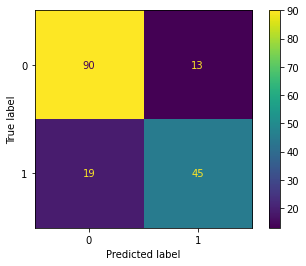

In [31]:
cm = confusion_matrix(y_test, y_pred_rfc, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=rfc.classes_)
disp.plot()

plt.show()

In [32]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.78      0.70      0.74        64

    accuracy                           0.81       167
   macro avg       0.80      0.79      0.79       167
weighted avg       0.81      0.81      0.81       167



In [33]:
param_grid = [{'max_depth': [8, 12, 16], 
         'min_samples_split': [12, 16, 20], 
         'criterion': ['gini', 'entropy']}]

In [34]:
rfc2=RandomForestClassifier(random_state=1107)


grid =  GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=20; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.7s
[CV] END .criterion=gini, max_depth=12, min_samples_split=12; total time=   0.7s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.7s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.8s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=20; total time=   0.7s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.9s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=20; total time=   0.8s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.7s
[CV] END ..criterion=gini, max_depth=8, min_samp

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [8, 12, 16],
                          'min_samples_split': [12, 16, 20]}],
             verbose=2)

In [35]:
model_cv = grid.best_estimator_

In [36]:
y_pred_cv = model_cv.predict(X_test)

print('Test_ac:',np.mean(y_test==y_pred_cv))

Test_ac: 0.8083832335329342


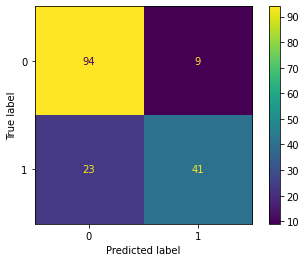

In [37]:
cm = confusion_matrix(y_test, y_pred_cv, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=grid.classes_)
disp.plot()

plt.show()

Feature: 0, Score: 0.16179
Feature: 1, Score: 0.37550
Feature: 2, Score: 0.14182
Feature: 3, Score: 0.04939
Feature: 4, Score: 0.05208
Feature: 5, Score: 0.18606
Feature: 6, Score: 0.03335


/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


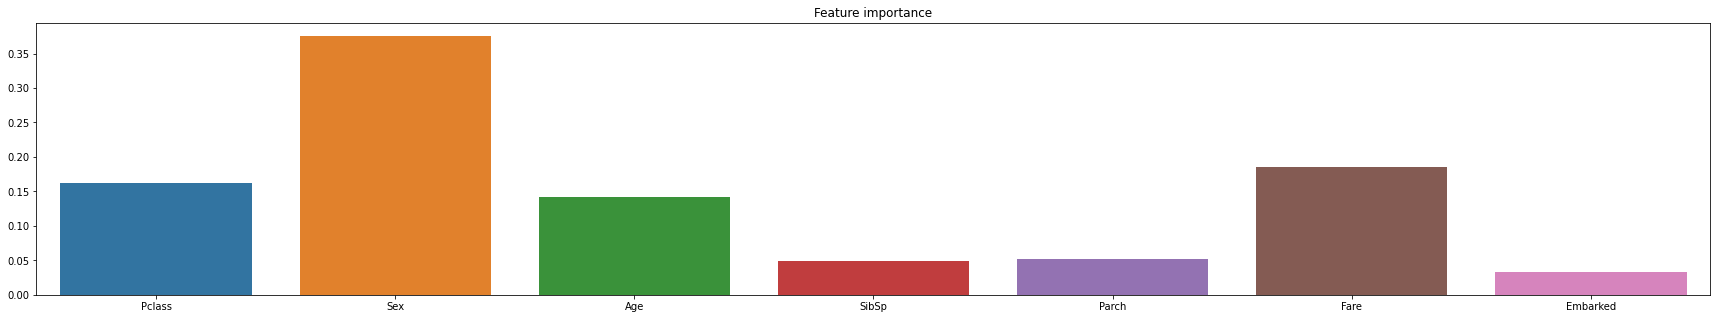

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [38]:
importance = model_cv.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# graficamos la importancia de las variables

plt.figure(figsize=(30,5))
columns = X.columns
sns.barplot(columns, importance)
plt.title('Feature importance')
plt.show()
columns

In [39]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterio
criterion=['gini','entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
#'max_features': max_features, # Son muy pocas variables por lo cual no vale la pena aplicarlo
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap,
'criterion':criterion}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [40]:
rfc3=RandomForestClassifier(random_state=1107)

grid_random=RandomizedSearchCV(estimator=rfc3,n_iter=100,cv=5,random_state=1107,param_distributions=random_grid)

In [41]:
grid_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1107)

In [42]:
best_param = grid_random.best_params_
best_model = RandomForestClassifier(**best_param)
best_model

RandomForestClassifier(criterion='entropy', max_depth=90, min_samples_leaf=4,
                       n_estimators=2000)

In [43]:
model_cv_2 = grid_random.best_estimator_

In [44]:
y_pred_cv_2 = model_cv_2.predict(X_test)

print('Test_ac:',np.mean(y_test==y_pred_cv_2))

Test_ac: 0.8143712574850299


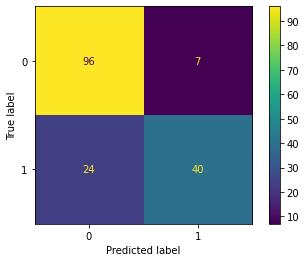

In [45]:
cm = confusion_matrix(y_test, y_pred_cv_2, labels=grid_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=grid_random.classes_)
disp.plot()

plt.show()

In [46]:
filename = '../models/final_model.sav'
pickle.dump(model_cv_2, open(filename, 'wb'))

XGBoost

In [52]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
print('Test_ac:',accuracy_score(y_test,y_xgb_pred))

Test_ac: 0.7844311377245509


In [53]:
xgb_2 = XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid_xgb = RandomizedSearchCV(xgb_2,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'eta': [0.05, 0.1, 0.15, 0.2, 0.25,
                                                0.3],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_log_loss')

In [54]:
xgb_2 = grid_xgb.best_estimator_

In [55]:
y_pred_xgb_2 = xgb_2.predict(X_test)

In [56]:
print('Test_ac:',accuracy_score(y_test, y_pred_xgb_2))

Test_ac: 0.8023952095808383


In [57]:
filename = '../models/xgboost_model.sav'
pickle.dump(grid_xgb, open(filename, 'wb'))